# Expectation Maximisation

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import norm
from matplotlib.widgets import Slider, Button

### Mixture of Gaussians

$p(y|\theta) = \sum_k \pi_k \cal{N}(y; \mu_k, \Sigma_k)$

$\theta = \{\pi_1, \pi_2, \mu_1, \mu_2, \Sigma_1, \Sigma_2\}$

<IPython.core.display.Javascript object>


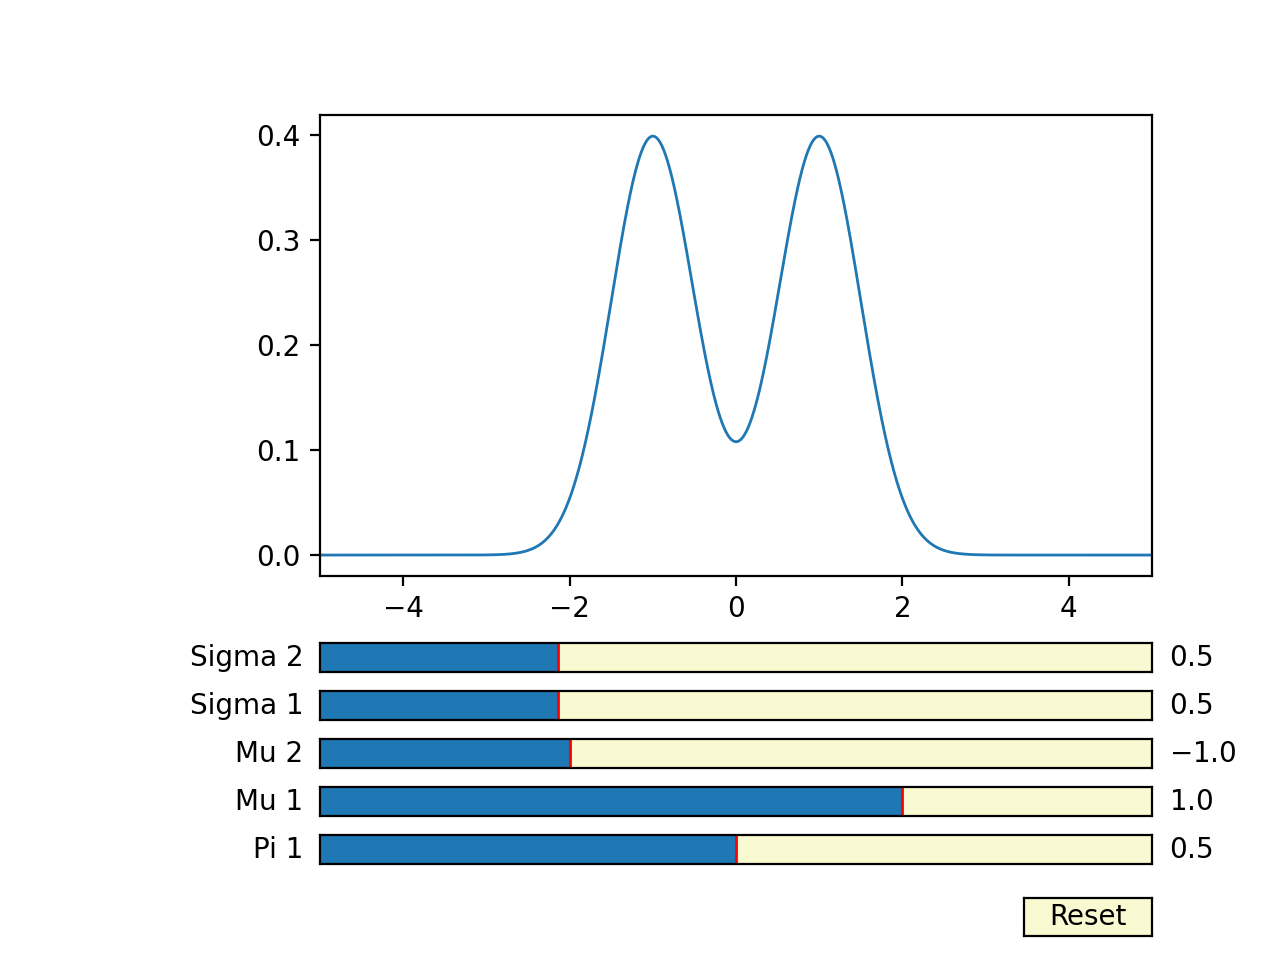

In [63]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.4)
x = np.arange(-5, 5, 0.001)
p1_0 = 0.5
p2_0 = 1-p1_0
m1_0 = 1
m2_0 = -1
s1_0 = 0.5
s2_0 = 0.5
delta_f = 0.1

y = p1_0*norm.pdf(x, loc=m1_0, scale=s1_0) + p2_0*norm.pdf(x, loc=m2_0, scale=s2_0)
l, = plt.plot(x, y, lw=1)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axp1 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axm1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axm2 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axs1 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axs2 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)

sp1 = Slider(axp1, 'Pi 1', 0, 1, valinit=p1_0, valstep=0.001)
sm1 = Slider(axm1, 'Mu 1', -2.5, 2.5, valinit=m1_0, valstep=0.1)
sm2 = Slider(axm2, 'Mu 2', -2.5, 2.5, valinit=m2_0, valstep=0.1)
ss1 = Slider(axs1, 'Sigma 1', 0.1, 1.5, valinit=s1_0, valstep=0.1)
ss2 = Slider(axs2, 'Sigma 2', 0.1, 1.5, valinit=s2_0, valstep=0.1)

def update(val):
    p1 = sp1.val
    m1 = sm1.val
    m2 = sm2.val
    s1 = ss1.val
    s2 = ss2.val
    
    l.set_ydata(p1*norm.pdf(x, loc=m1, scale=s1) + (1-p1)*norm.pdf(x, loc=m2, scale=s2))
    fig.canvas.draw_idle()

sp1.on_changed(update)
sm1.on_changed(update)
sm2.on_changed(update)
ss1.on_changed(update)
ss2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sp1.reset()
    sm1.reset()
    sm2.reset()
    ss1.reset()
    ss2.reset()
button.on_clicked(reset)
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.4)
x = np.arange(-5, 5, 0.001)
p1_0 = 0.5
p2_0 = 1-p1_0
l1_0 = 1
l2_0 = -1

y = p1_0*norm.pdf(x, loc=m1_0, scale=s1_0) + p2_0*norm.pdf(x, loc=m2_0, scale=s2_0)
l, = plt.plot(x, y, lw=1)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axp1 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axm1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axm2 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axs1 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axs2 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)

sp1 = Slider(axp1, 'Pi 1', 0, 1, valinit=p1_0, valstep=0.001)
sm1 = Slider(axm1, 'Mu 1', -2.5, 2.5, valinit=m1_0, valstep=0.1)
sm2 = Slider(axm2, 'Mu 2', -2.5, 2.5, valinit=m2_0, valstep=0.1)
ss1 = Slider(axs1, 'Sigma 1', 0.1, 1.5, valinit=s1_0, valstep=0.1)
ss2 = Slider(axs2, 'Sigma 2', 0.1, 1.5, valinit=s2_0, valstep=0.1)

def update(val):
    p1 = sp1.val
    m1 = sm1.val
    m2 = sm2.val
    s1 = ss1.val
    s2 = ss2.val
    
    l.set_ydata(p1*norm.pdf(x, loc=m1, scale=s1) + (1-p1)*norm.pdf(x, loc=m2, scale=s2))
    fig.canvas.draw_idle()

sp1.on_changed(update)
sm1.on_changed(update)
sm2.on_changed(update)
ss1.on_changed(update)
ss2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sp1.reset()
    sm1.reset()
    sm2.reset()
    ss1.reset()
    ss2.reset()
button.on_clicked(reset)
    
plt.show()